# Machine Learning: uma brevíssima introdução 🐣

*   Identificação de padrões
*   Enorme potencial de agregar valor
*   "Todos os modelos estão errados, mas alguns são úteis" 🤔
*   Uso consciente: interpretabilidade e... garbage in, garbage out!
*   Data mining ▶ machine learning ▶ deep learning
*   Inteligência artificial ❔❔❔
*   Regressão, classificação e clustering/segmentação
*   Aprendizado supervisionado x não-supervisionado

### Referências 📔

🔗 [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)

🔗 [Machine Learning with Python Cookbook](https://www.oreilly.com/library/view/machine-learning-with/9781491989371/)

🔗 [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

🔗 [Deep Leaning](https://www.deeplearningbook.org/)

🔗 [Real Python: Python Machine Learning Tutorials](https://realpython.com/tutorials/machine-learning/)

🔗 [Kaggle: Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)

🔗 [Kaggle](https://www.kaggle.com/)

## Scikit-Learn 🧠

🔗 [Documentação](https://scikit-learn.org/stable/index.html)

🔗 [Guia do usuário](https://scikit-learn.org/stable/user_guide.html)

🔗 [Tutoriais](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

### Algumas observações sobre **modelagem**

*   Cuidado com a tentação de testar muitos modelos e adotar o "melhor"
*   Métricas podem ser traiçoeiras
*   É fundamental entender e validar o modelo tanto quanto possível ou pelo menos sua saída
*   Representatividade dos conjuntos de treinamento e teste ▶ potencial de generalização
*   Overfitting

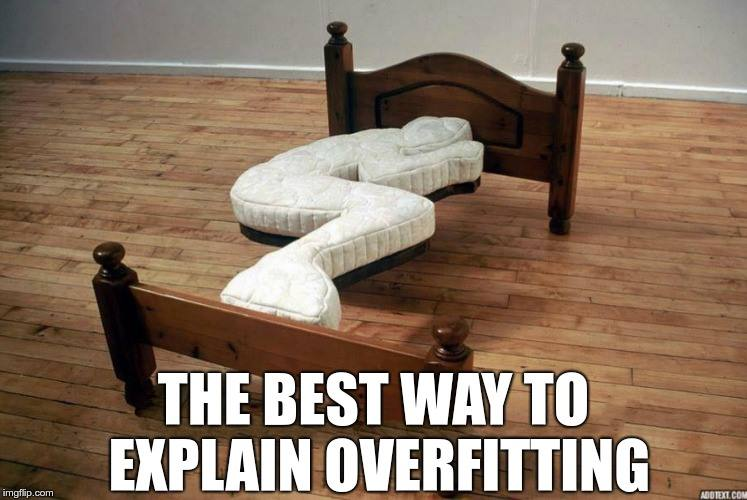

## Ciclo de vida 🔄

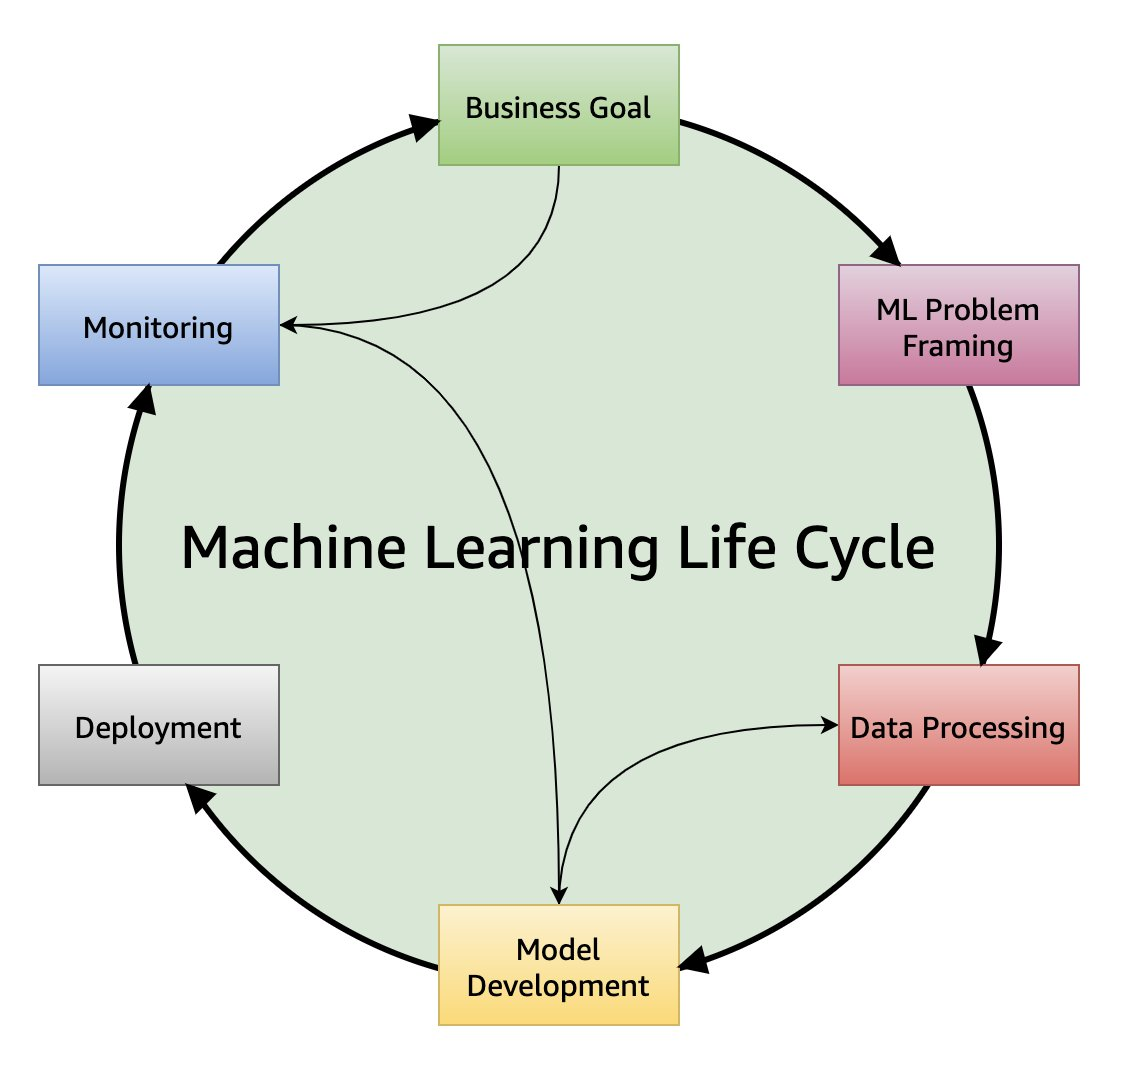

🔗 [Well-Architected machine learning lifecycle](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/well-architected-machine-learning-lifecycle.html)

---

© 2023 Augusto Fadel 🔷 augustofadel@gmail.com

## Fluxo de caixa: contas a receber 🤑

Contas a receber representam o valor monetários dos negócios que uma empresa realizou e pelos quais ainda não recebeu o pagamento.

Técnicas de machine learning aplicadas a dados históricos do relacionamento com os clientes podem permitir estimar a data de pagamento e fazer uma previsão mais precisa do fluxo de caixa.

🔗 [Using Artificial Intelligence to Predict Invoice Payment Dates](https://www.crfonline.org/wp-content/uploads/2018/04/HighRadius-Proactive-Collections-Management-Using-AI-1Q2018-Journal.pdf)

🔗 [Machine learning for predicting propensity-to-pay energy bills](https://www.sciencedirect.com/science/article/pii/S2667305323000017)

🔗 [AI-Based Invoice Payment Date Prediction for B2B](https://link.springer.com/chapter/10.1007/978-981-99-1479-1_41)

🔗 [Predição de Pagamentos Atrasados Através de Algoritmos Baseados em Árvore de Decisão](http://revistas.poli.br/index.php/repa/article/view/1746)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Importando dados

Dados disponíveis no repositório [SkywalkerHub/Payment-Date-Prediction](https://github.com/SkywalkerHub/Payment-Date-Prediction).

#### Descrição das principais variáveis:

*   `cust_number`: número do cliente
*   `name_customer`: nome do cliente
*   `buisness_year`: ano
*   `clear_date`: data de pagamento
*   `document_create_date`: data de emissão
*   `due_in_date`: data de vencimento
*   `doc_id`: identificador da nota
*   `total_open_amount`: valor totla devido
*   `isOpen`: indicadora de pagamento em aberto

Mais detalhes [aqui](https://github.com/SkywalkerHub/Payment-Date-Prediction/blob/main/Dataset-info.md).


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SkywalkerHub/Payment-Date-Prediction/master/Dataset.csv')
df

### Pré-processamento

In [ ]:
df.info()

In [ ]:
df['clear_date_null'] = df['clear_date'].isnull()
df.groupby(['clear_date_null', 'isOpen']).size()

In [ ]:
print(df.shape)

df.dropna(subset = ['invoice_id'], inplace=True)
df.drop('area_business', axis=1, inplace=True)

print(df.shape)

In [ ]:
df[['document_create_date.1', 'clear_date', 'due_in_date']].head()

In [ ]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

df[['document_create_date.1', 'clear_date', 'due_in_date']].head()

In [ ]:
for cols in df.columns:
  print(cols, ':', str(df[cols].nunique()))

In [ ]:
print(df.shape)

df.drop(['document type', 'posting_id'], axis=1, inplace=True)
df.drop(['posting_date', 'doc_id', 'document_create_date', 'clear_date_null'], axis=1, inplace=True)

print(df.shape)

In [ ]:
sns.countplot(x = df['business_code'])

#### Preparação das variáveis (feature engineering)

##### Variável resposta (target)

In [ ]:
# variável resposta para modelo de regressão (atraso em dias)
df['atraso'] = (df['clear_date'] - df['due_in_date']).dt.days

# variável resposta para modelo de classificação (3 categorias: sem atraso, atraso de até 30 dias, atraso supeiror a 30 dias)
limites_atraso = [-365,0,30,365]
df['atraso_categ'] = pd.cut(df['atraso'], bins = limites_atraso)

df[['due_in_date', 'clear_date', 'atraso', 'atraso_categ']].head()

In [ ]:
df.groupby('atraso_categ').size()

In [ ]:
df['atraso'].mean()

In [ ]:
df.groupby('business_code').size()

In [ ]:
df.groupby('business_code')['atraso'].mean()

In [ ]:
df.groupby('business_code')['atraso'].min()

In [ ]:
df.groupby('business_code')['atraso'].max()

In [ ]:
df.groupby('business_code')['atraso'].std()

In [ ]:
sns.boxplot(x='atraso', y='business_code', data=df)

In [ ]:
sns.barplot(x='atraso', y='business_code', data=df, estimator='mean')

In [ ]:
df.sort_values(by='document_create_date.1', inplace=True)
df2 = df[df.clear_date.notnull()].reset_index().copy()

delay_bins = [0,15,30,45,60,300]
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(df2['total_open_amount'], bins=amount_bins)
delay_bucket = pd.cut(df2['atraso'], bins = delay_bins)
tab = pd.crosstab(index=new_open_amount_bin, columns=delay_bucket)
tab

In [ ]:
sns.heatmap(tab, cmap='coolwarm', annot=True, fmt='')

In [ ]:
df.groupby('invoice_currency').size()

##### Variáveis preditoras

In [ ]:
df2[['cust_number', 'clear_date', 'document_create_date.1', 'due_in_date', 'total_open_amount', 'atraso']]

In [ ]:
df2['emissao_dia'] = df2['document_create_date.1'].dt.day
df2['emissao_mes'] = df2['document_create_date.1'].dt.month

df2['vencimento_dia'] = df2['due_in_date'].dt.day
df2['vencimento_mes'] = df2['due_in_date'].dt.month

df2[['document_create_date.1', 'due_in_date', 'emissao_mes', 'emissao_dia', 'vencimento_mes', 'vencimento_dia']]

In [ ]:
df2 = df2[['cust_number', 'total_open_amount', 'atraso', 'atraso_categ', 'emissao_mes', 'emissao_dia', 'vencimento_mes', 'vencimento_dia', 'clear_date']]
df2

In [ ]:
df2['cn'] = df2['cust_number'].str.extract('(\d+)').astype(str).astype(float)
df2.drop('cust_number', axis=1, inplace=True)

df2

#### Conjuntos de treinamento/validação/teste

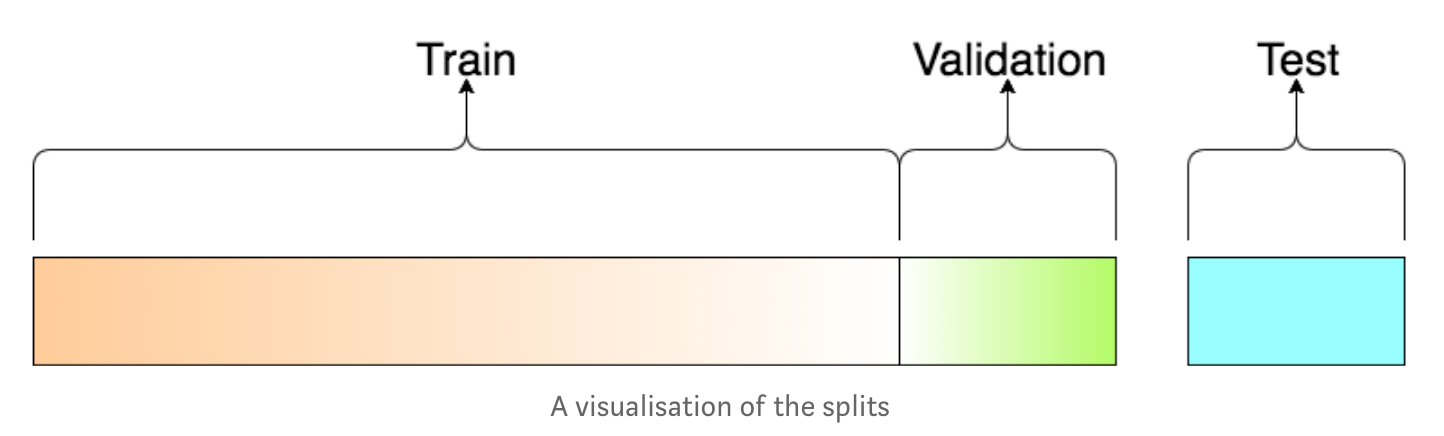

In [ ]:
devedores = df[df.clear_date.isnull()].reset_index().copy()
devedores['emissao_dia'] = devedores['document_create_date.1'].dt.day
devedores['emissao_mes'] = devedores['document_create_date.1'].dt.month
devedores['vencimento_dia'] = devedores['due_in_date'].dt.day
devedores['vencimento_mes'] = devedores['due_in_date'].dt.month
devedores['cn'] = devedores['cust_number'].str.extract('(\d+)').astype(str).astype(float)
devedores.drop(columns=['index', 'clear_date', 'cust_number', 'vencimento_mes'], inplace=True)

devedores

In [ ]:
treino_teste = df2[df2.clear_date.notnull()].reset_index()
treino_teste.drop(columns=['index', 'clear_date'], inplace=True)
treino_teste

#### Seleção de variáveis (feature selection)

In [ ]:
cor = treino_teste.corr(numeric_only=True)
sns.heatmap(cor, cmap='coolwarm', annot=True)

In [ ]:
treino_teste.drop(columns=['vencimento_mes'], inplace=True)

#### Conjunto de dados de treinamento

In [ ]:
X = treino_teste.drop(['atraso', 'atraso_categ'], axis=1)
X

In [ ]:
y_reg = treino_teste['atraso']
y_reg

In [ ]:
y_clas = treino_teste['atraso_categ'].astype(str)
y_clas

### Modelagem

Árvore de Decisão (Decision Tree)

*   boa explicabilidade
*   alta variabilidade (train/test split)

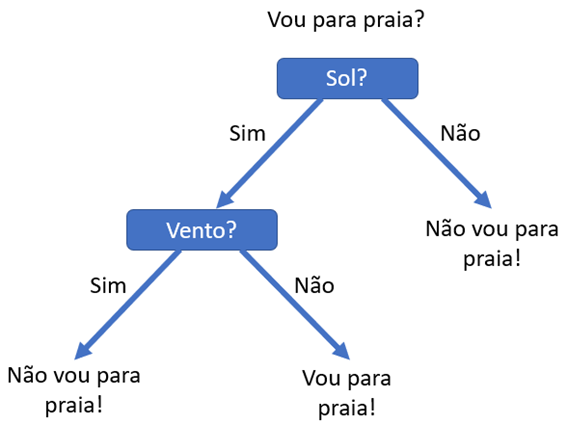

🔗 [Árvore de Decisão](https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/)

Random Forrest

* bagging: DT ensemble
* amostras do conjunto de treinamento (reduz variabilidade) + subconjunto de variáveis preditoras (reduz correlação entre as árvores)
* é necessároio especificar (ao menos) o número de árvores


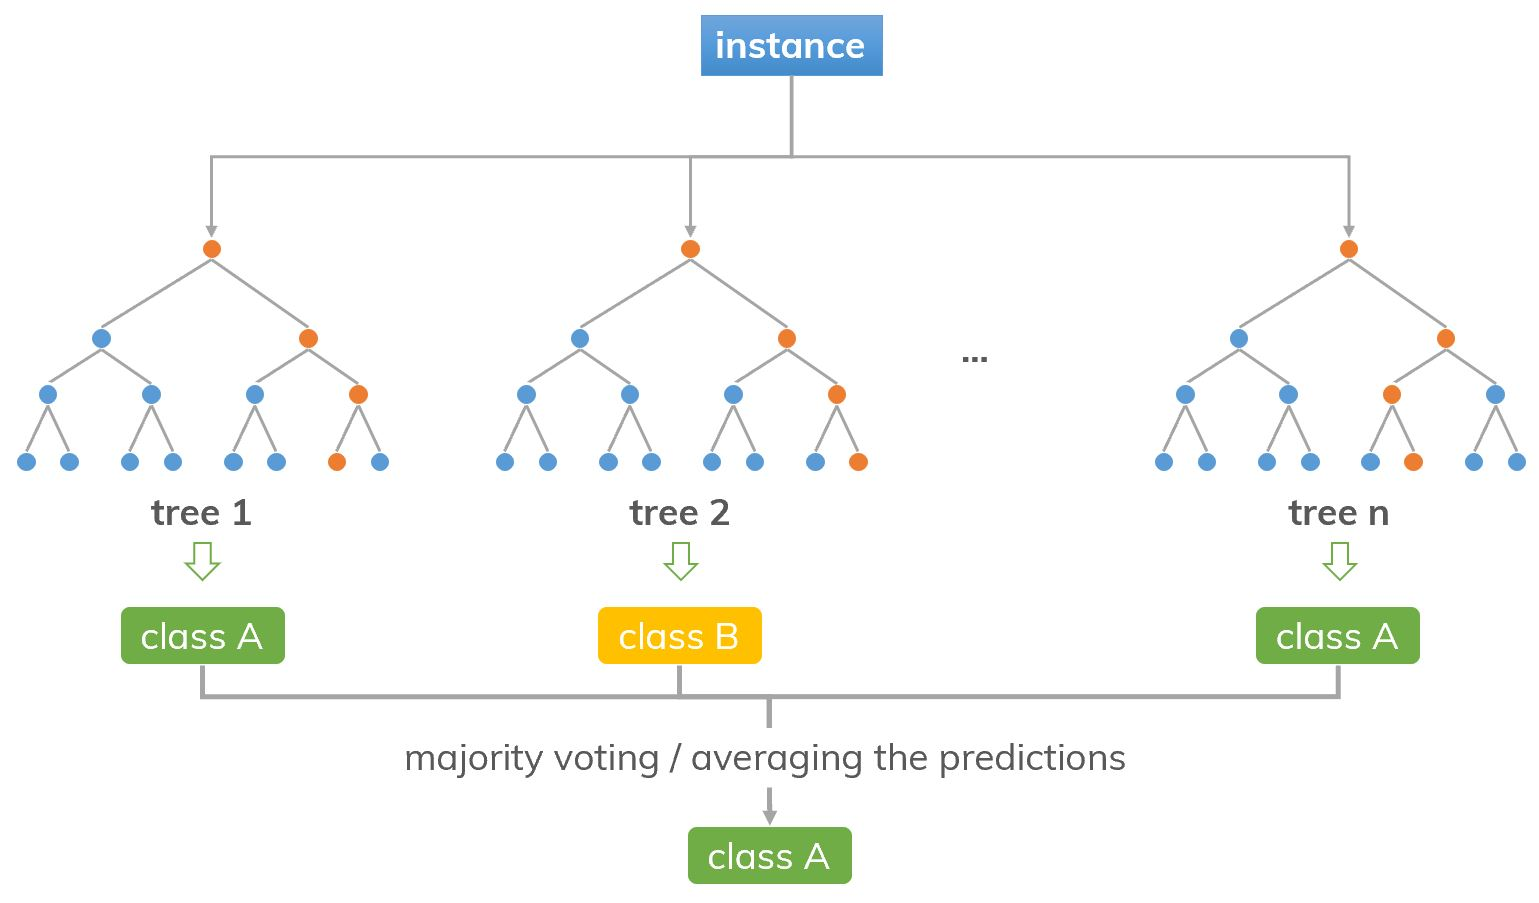

🔗 [Random Forest](https://dinhanhthi.com/random-forest/)

#### Regressão

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

In [ ]:
import sklearn.metrics as sm

print('Mean absolute error =', round(sm.mean_absolute_error(y_test, predicted), 2))
print('Mean squared error =', round(sm.mean_squared_error(y_test, predicted), 2))
print('Median absolute error =', round(sm.median_absolute_error(y_test, predicted), 2))
print('Explain variance score =', round(sm.explained_variance_score(y_test, predicted), 2))
print('R2 score =', round(sm.r2_score(y_test, predicted), 2))
print('Accuracy =', rf.score(X_test, y_test))

💡 [Accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)

💡 [Mean absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)

🔗 [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['atraso_estimado'] = predicted

resultado

In [ ]:
devedores['atraso_estimado'] = rf.predict(devedores[['total_open_amount', 'emissao_mes', 'emissao_dia', 'vencimento_dia', 'cn']])
devedores['data_estimada'] = devedores['due_in_date'] + pd.to_timedelta(np.ceil(devedores['atraso_estimado']), unit='D')

devedores[['name_customer', 'total_open_amount', 'due_in_date', 'atraso_estimado', 'data_estimada']]

#### Classificação

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_clas, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

In [ ]:
import sklearn.metrics as sm

print('Accuracy =', rf.score(X_test, y_test))

💡 [Accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)

💡 [Mean absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)

🔗 [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

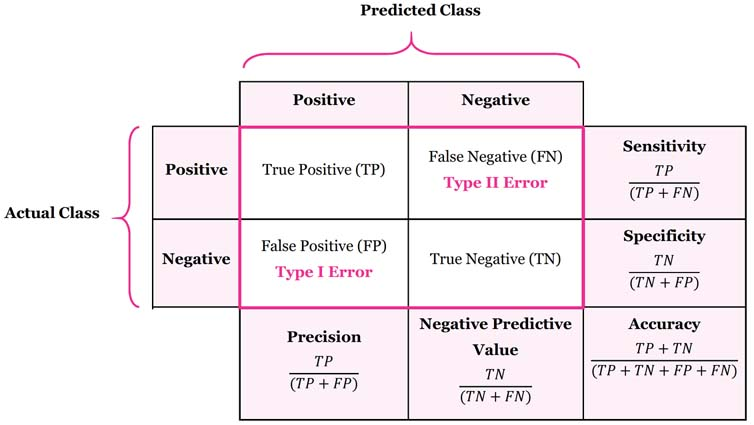

🔗 [Confusion Matrix](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

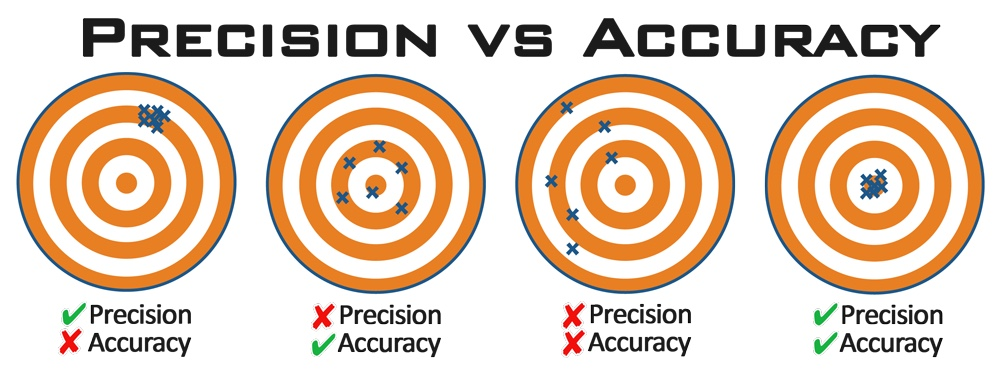

🔗 [Accuracy vs Precision](http://socraticcoffee.com/2015/05/measuring-total-dissolved-solids-a-refractometer-comparison-part-ii/)

In [ ]:
resultado = pd.DataFrame(y_test.reset_index().drop('index', axis=1))
resultado['atraso_estimado'] = predicted

resultado

categorias estimadas

In [ ]:
devedores['atraso_estimado'] = rf.predict(devedores[['total_open_amount', 'emissao_mes', 'emissao_dia', 'vencimento_dia', 'cn']])
devedores[['name_customer', 'total_open_amount', 'due_in_date', 'atraso_estimado']]

probabilidades estimadas

In [ ]:
pd.DataFrame(rf.predict_proba(devedores[['total_open_amount', 'emissao_mes', 'emissao_dia', 'vencimento_dia', 'cn']]), columns=['(-365, 0]', '(0, 30]', '(30, 365]'])

In [ ]:
devedores.groupby('atraso_estimado').size()

Estimativa de valores a receber:

In [ ]:
print('sem atraso:', round(devedores[devedores['atraso_estimado'] == '(-365, 0]']['total_open_amount'].sum()))
print('atraso de até 30 dias:', round(devedores[devedores['atraso_estimado'] == '(0, 30]']['total_open_amount'].sum()))
print('atraso superior a 30 dias:', round(devedores[devedores['atraso_estimado'] == '(30, 365]']['total_open_amount'].sum()))

#### Clustering (agrupamento)

* não supervisionado
* identifica grupos de objetos similares
* é necessário definir o número de grupos

🔗 [Data Mining: Concepts and Techniques](https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques)

In [ ]:
df3 = df2.drop(['atraso', 'atraso_categ', 'clear_date'], axis=1).copy()
df3

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3_pad = scaler.fit_transform(df3)

df3_pad

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df3_pad)

In [ ]:
kmeans.labels_

In [ ]:
resultado = df2[['atraso', 'atraso_categ']].copy()
resultado['cluster'] = kmeans.labels_

resultado

In [ ]:
pd.crosstab(resultado['atraso_categ'], resultado['cluster'])

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df3['vencimento_mes'], df3['total_open_amount'])

## Exemplo Iris

🔗 [fonte](https://miro.medium.com/v2/resize:fit:2550/0*GVjzZeYrir0R_6-X.png)

In [ ]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data['frame']

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(data['frame'], hue='target', height=3)

In [ ]:
scaler = StandardScaler()
iris_pad = scaler.fit_transform(data['data'])

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris_pad)

resultado = pd.DataFrame(data['target'])
resultado['cluster'] = kmeans.labels_

pd.crosstab(resultado['target'], resultado['cluster'])